In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats
from sklearn.decomposition import PCA
from IPython.display import display
import ipywidgets as widgets
import xgboost as xgb

In [158]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('C:/Users/USER/OneDrive - universidadean.edu.co/3. Machine learning/Proyecto final/datos_granja.csv',sep=";")

print(df)

           Fecha   CO      Ciudad  Temperatura         Depto     Consumo  Unidades  Edad     Sexo TipoGranja   Peso
0     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31   machos     MANUAL  1.718
1     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31  hembras     MANUAL  1.718
2     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31   machos     MANUAL  1.943
3     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31  hembras     MANUAL  1.943
4     17/07/2024  E08     Sasaima           26  Cundinamarca  196.575758    2977.0    32  hembras     MANUAL  1.598
...          ...  ...         ...          ...           ...         ...       ...   ...      ...        ...    ...
1752  17/10/2024  E25    Restrepo           29          Meta  577.322581    7521.0    30   machos     MANUAL  1.817
1753  17/10/2024  E25    Restrepo           29          Meta  577.322581

In [159]:
# Resumen estadístico de las columnas numéricas
print(df.describe())


       Temperatura       Consumo       Unidades         Edad         Peso
count  1757.000000   1757.000000    1757.000000  1757.000000  1757.000000
mean     25.105293   1012.022232   10074.742266    30.896414     1.735418
std       5.577857   2472.231794    8743.540596     4.896023     0.413089
min      12.000000     -0.736842       6.161000     5.000000     0.155000
25%      23.000000    444.517241    6957.000000    28.000000     1.553000
50%      23.000000    554.451613    7521.000000    31.000000     1.760000
75%      29.000000    714.625000   10686.000000    33.000000     1.929000
max      34.000000  22939.926190  123412.000000    45.000000     7.000000


In [160]:
# Comprobar valores nulos en cada columna
print(df.isnull().sum())

Fecha          0
CO             0
Ciudad         0
Temperatura    0
Depto          0
Consumo        0
Unidades       0
Edad           0
Sexo           0
TipoGranja     0
Peso           0
dtype: int64


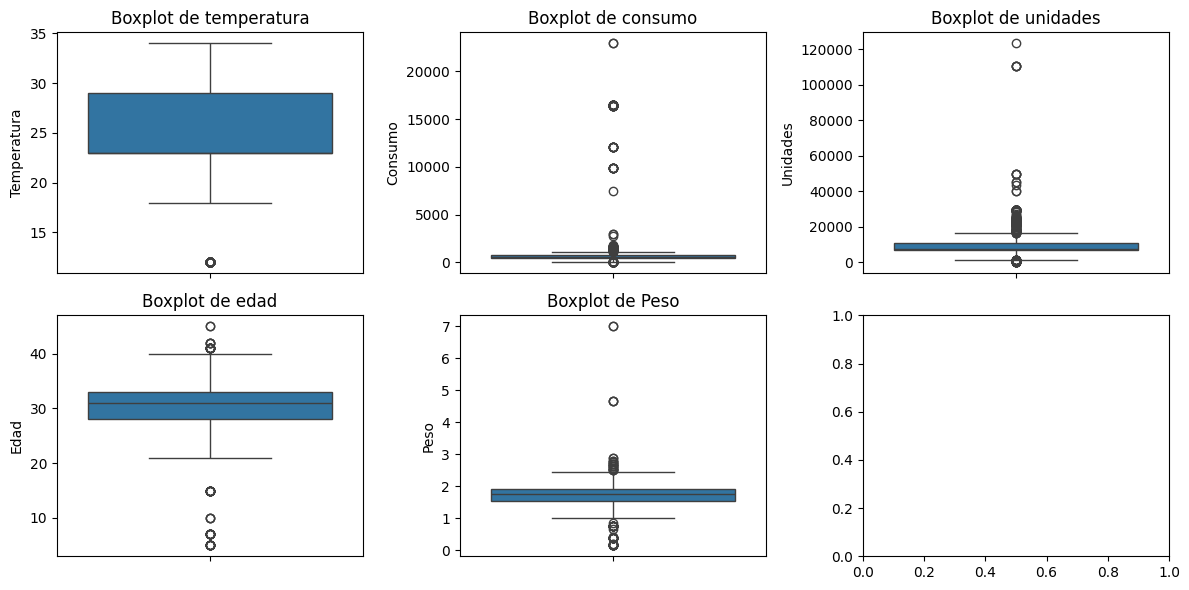

In [161]:

# Crear la figura con subplots: 2 filas, 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # Ajusta figsize si es necesario

# Primer gráfico: Boxplot de Temperatura
sns.boxplot(ax=axes[0, 0], y=df['Temperatura'])
axes[0, 0].set_title('Boxplot de temperatura')

# Segundo gráfico: Boxplot de Consumo
sns.boxplot(ax=axes[0, 1], y=df['Consumo'])
axes[0, 1].set_title('Boxplot de consumo')

# Tercer gráfico: Boxplot de Unidades
sns.boxplot(ax=axes[0, 2], y=df['Unidades'])
axes[0, 2].set_title('Boxplot de unidades')

# Cuarto gráfico: Boxplot de Edad
sns.boxplot(ax=axes[1, 0], y=df['Edad'])
axes[1, 0].set_title('Boxplot de edad')

# Quinto gráfico: Boxplot de Peso
sns.boxplot(ax=axes[1, 1], y=df['Peso'])
axes[1, 1].set_title('Boxplot de Peso')

# Si hay otro gráfico, por ejemplo, puedes dejar el último espacio vacío o poner un gráfico adicional si es necesario
# axes[1, 2] está vacío en este caso

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [162]:
columnas = ['Temperatura', 'Consumo', 'Unidades', 'Edad', 'Peso']

# Crear una copia del DataFrame original para almacenar los datos filtrados
df_filtered = df.copy()

# Calcular Z-Score para cada columna y eliminar outliers de manera acumulativa pero correcta
for columna in columnas:
    # Calcular el z-score de cada valor en la columna original
    z_scores = stats.zscore(df_filtered[columna])
    # Filtrar los datos para mantener solo aquellos con un z-score en el rango [-3, 3]
    df_filtered = df_filtered[(z_scores > -3) & (z_scores < 3)]

    # Imprimir cuántos outliers fueron eliminados para esta columna específica
    outliers_count = len(df) - len(df_filtered)
    print(f"Valores atípicos eliminados en la columna {columna}: [{outliers_count} rows]")

# Mostrar el DataFrame resultante sin outliers
print(df_filtered)



Valores atípicos eliminados en la columna Temperatura: [0 rows]
Valores atípicos eliminados en la columna Consumo: [50 rows]
Valores atípicos eliminados en la columna Unidades: [64 rows]
Valores atípicos eliminados en la columna Edad: [105 rows]
Valores atípicos eliminados en la columna Peso: [113 rows]
           Fecha   CO      Ciudad  Temperatura         Depto     Consumo  Unidades  Edad     Sexo TipoGranja   Peso
0     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31   machos     MANUAL  1.718
1     17/07/2024  E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31  hembras     MANUAL  1.718
2     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31   machos     MANUAL  1.943
3     17/07/2024  E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31  hembras     MANUAL  1.943
4     17/07/2024  E08     Sasaima           26  Cundinamarca  196.575758    2977.0    32  hembras     MANUAL  1.598

In [163]:
df_filtered['Fecha'] = pd.to_datetime(df_filtered['Fecha'], format='%d/%m/%Y')  # Convierte la columna Fecha a datetime

# Extraer componentes de la fecha
df_filtered['año'] = df_filtered['Fecha'].dt.year
df_filtered['mes'] = df_filtered['Fecha'].dt.month
df_filtered['día'] = df_filtered['Fecha'].dt.day
df_filtered['día_semana'] = df_filtered['Fecha'].dt.dayofweek  # 0 = Lunes, 6 = Domingo

# Crear variables cíclicas para capturar patrones estacionales
df_filtered['mes_sin'] = np.sin(df_filtered['mes'] * 2 * np.pi / 12)
df_filtered['mes_cos'] = np.cos(df_filtered['mes'] * 2 * np.pi / 12)
df_filtered['día_semana_sin'] = np.sin(df_filtered['día_semana'] * 2 * np.pi / 7)
df_filtered['día_semana_cos'] = np.cos(df_filtered['día_semana'] * 2 * np.pi / 7)

# Opcional: Eliminar la columna original de Fecha si no es necesaria
df_filtered = df_filtered.drop(columns=['Fecha'])

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.width', 1000)  # Aumenta el ancho para mostrar todas las columnas en una línea
pd.set_option('display.max_columns', None)  # Asegura que no haya límite en la cantidad de columnas


# Imprimir el DataFrame
print(df_filtered)


       CO      Ciudad  Temperatura         Depto     Consumo  Unidades  Edad     Sexo TipoGranja   Peso   año  mes  día  día_semana   mes_sin   mes_cos  día_semana_sin  día_semana_cos
0     E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31   machos     MANUAL  1.718  2024    7   17           2 -0.500000 -0.866025        0.974928       -0.222521
1     E45  Fusagasuga           21  Cundinamarca  695.250000   10057.0    31  hembras     MANUAL  1.718  2024    7   17           2 -0.500000 -0.866025        0.974928       -0.222521
2     E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31   machos     MANUAL  1.943  2024    7   17           2 -0.500000 -0.866025        0.974928       -0.222521
3     E45  Fusagasuga           21  Cundinamarca  676.812500    7298.0    31  hembras     MANUAL  1.943  2024    7   17           2 -0.500000 -0.866025        0.974928       -0.222521
4     E08     Sasaima           26  Cundinamarca  196.575758    2977.0    32  he

#### Eliminar variables que no se usan

In [164]:
df_filtered = df_filtered.drop(columns=['CO',"año","mes","día","día_semana"])

#### Crear data frame para variables independientes y la variable dependiente

In [165]:
# Separar la columna objetivo antes de aplicar el preprocesamiento
df_peso = df_filtered['Peso']
df_filtered_ind = df_filtered.drop(columns=['Peso'])

#### Variables categoricas a binarias

In [166]:
# Seleccionar solo las variables categóricas y todas las columnas
categorical_features = ['Ciudad', 'Depto', 'Sexo', 'TipoGranja']
non_categorical_features = df_filtered.drop(columns=categorical_features).columns

# Crear y aplicar el OneHotEncoder directamente a las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
X_categorical = encoder.fit_transform(df_filtered[categorical_features])

# Crear nombres de columnas para el DataFrame resultante
categorical_column_names = encoder.get_feature_names_out(categorical_features)

# Crear un DataFrame solo con las variables categóricas en formato binario
df_categorical_binary = pd.DataFrame(X_categorical, columns=categorical_column_names, index=df_filtered.index)

# Crear un nuevo DataFrame que incluya todas las columnas excepto las categóricas sin transformar
df_tranform = pd.concat([df_filtered[non_categorical_features], df_categorical_binary], axis=1)

# Ver el nuevo DataFrame con todas las columnas y las categóricas transformadas
print("Nuevo DataFrame con todas las columnas, incluyendo las variables categóricas transformadas:")
print(df_tranform)



Nuevo DataFrame con todas las columnas, incluyendo las variables categóricas transformadas:
      Temperatura     Consumo  Unidades  Edad   Peso   mes_sin   mes_cos  día_semana_sin  día_semana_cos  Ciudad_Arbelaez  Ciudad_Cabuyaro  Ciudad_Cumaral  Ciudad_Facatativa  Ciudad_Fusagasuga  Ciudad_Granada  Ciudad_La Mesa  Ciudad_Nilo  Ciudad_Paratebueno  Ciudad_Restrepo  Ciudad_Sasaima  Ciudad_Silvania  Ciudad_Villeta                          Depto_Cundinamarca  Depto_Meta  Sexo_hembras  Sexo_machos  TipoGranja_AUTOMATICA  TipoGranja_MANUAL  TipoGranja_SEMI AUTOMATICA
0              21  695.250000   10057.0    31  1.718 -0.500000 -0.866025        0.974928       -0.222521              0.0              0.0             0.0                0.0                1.0             0.0             0.0          0.0                 0.0              0.0             0.0              0.0                                     0.0                 1.0         0.0           0.0          1.0                    0.0  

#### Correlacion con variables categoricas a binarias

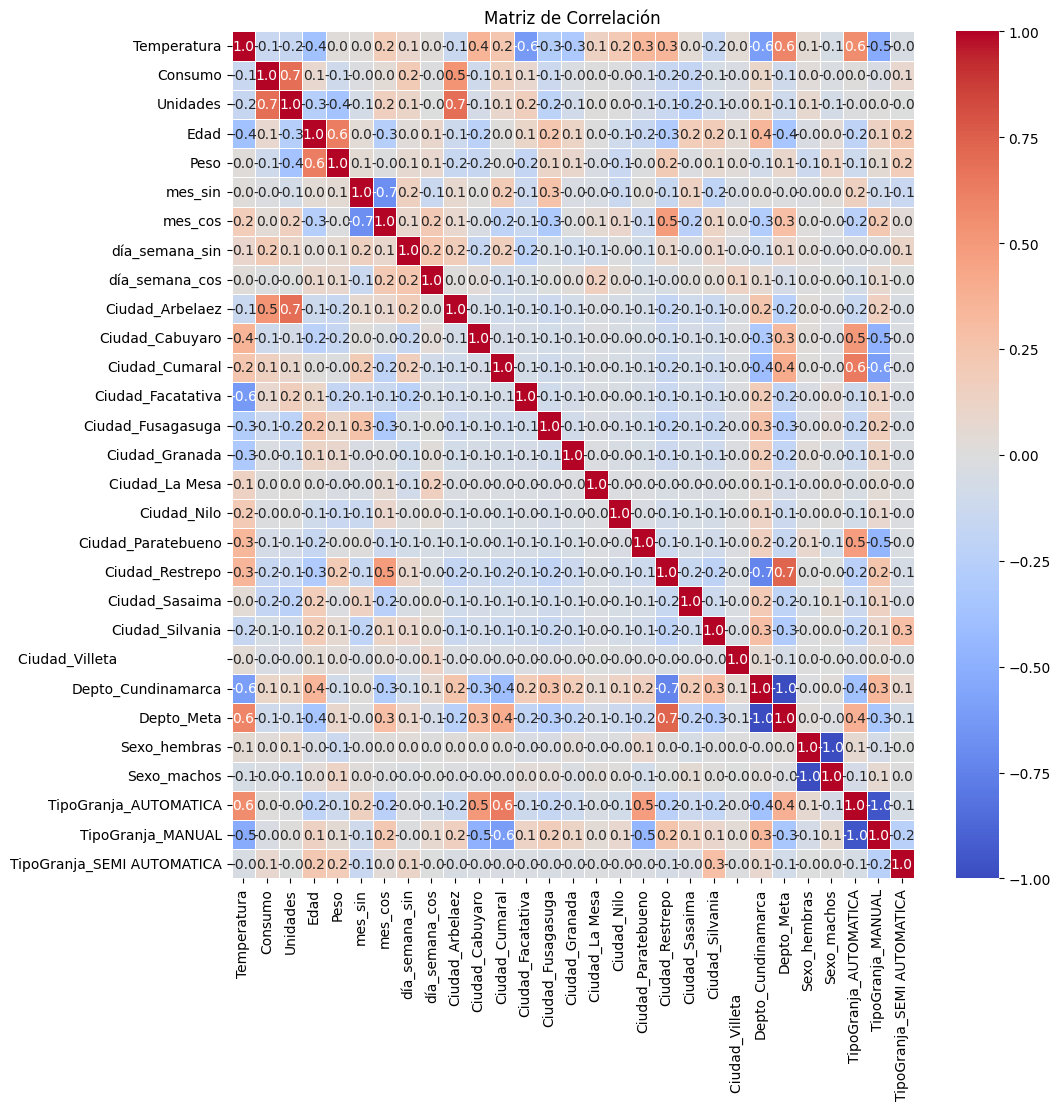

In [167]:
# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix_binary = df_tranform.corr()

# Configurar el tamaño de la figura para que se ajuste a matrices grandes
plt.figure(figsize=(11, 11))  # Ajusta el tamaño según sea necesario

# Usar seaborn para crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix_binary, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

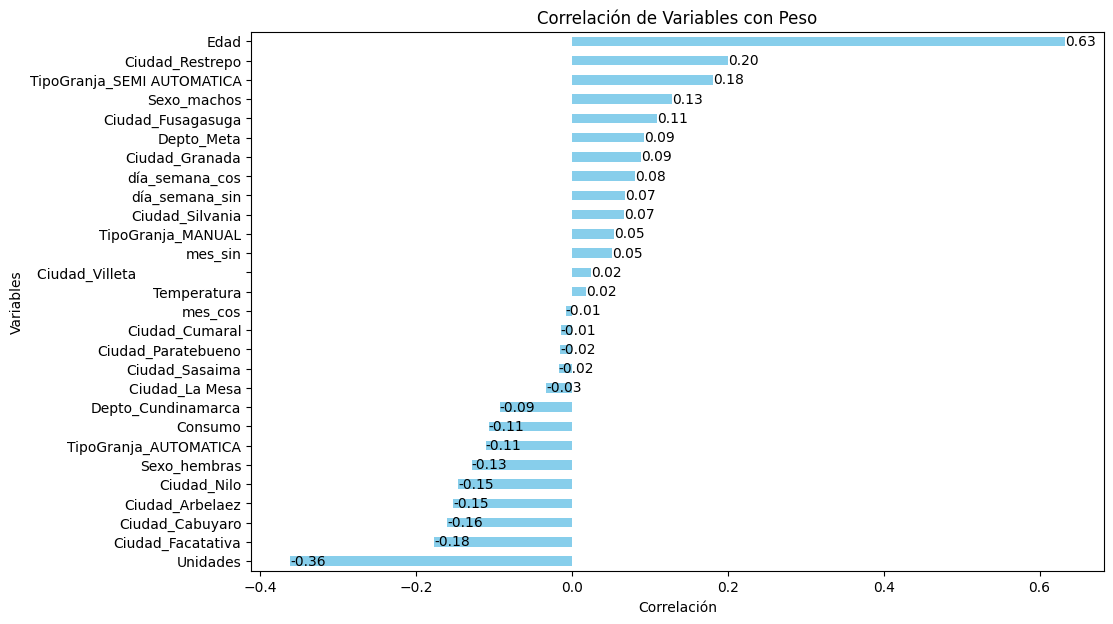

In [168]:
# Calcular la correlación solo con respecto a "Peso"
correlation_with_peso = df_tranform.corr()['Peso'].drop('Peso')  # Excluye la auto-correlación de "Peso" con "Peso"

# Ordenar la correlación de mayor a menor para una mejor visualización
correlation_with_peso_sorted = correlation_with_peso.sort_values()

# Aumentar el tamaño del gráfico
plt.figure(figsize=(11, 7))

# Crear el gráfico de barras con la correlación ordenada
correlation_with_peso_sorted.plot(kind='barh', color='skyblue')
plt.title('Correlación de Variables con Peso')
plt.xlabel('Correlación')
plt.ylabel('Variables')

# Agregar etiquetas de valor al final de cada barra
for index, value in enumerate(correlation_with_peso_sorted):
    plt.text(value, index, f'{value:.2f}', va='center')

#### Correlacion con varios metodos

In [169]:
# 1. Correlación de Pearson
correlacion_pearson = df_tranform.corr(method='pearson')

# 2. Correlación de Spearman
correlacion_spearman = df_tranform.corr(method='spearman')

# 3. Correlación de Kendall
correlacion_kendall = df_tranform.corr(method='kendall')


# Crear un contenedor con desplazamiento
out = widgets.Output(layout={'height': '600px', 'overflow_y': 'scroll', 'border': '1px solid black'})

# Dibujar dentro del contenedor de desplazamiento
with out:
    plt.figure(figsize=(20, 40))

    # 1. Correlación de Pearson
    plt.subplot(3, 1, 1)
    sns.heatmap(correlacion_pearson, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlación de Pearson')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # 2. Correlación de Spearman
    plt.subplot(3, 1, 2)
    sns.heatmap(correlacion_spearman, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlación de Spearman')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    # 3. Correlación de Kendall
    plt.subplot(3, 1, 3)
    sns.heatmap(correlacion_kendall, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlación de Kendall')
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste para título principal
    plt.show()

# Mostrar el contenedor con la barra de desplazamiento
display(out)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [170]:
correlation_with_peso_pearson = correlacion_pearson['Peso'].sort_values()
correlation_with_peso_spearman = correlacion_spearman['Peso'].sort_values()
correlation_with_peso_kendall = correlacion_kendall['Peso'].sort_values()

# Crear un contenedor con desplazamiento
out = widgets.Output(layout={'height': '600px', 'overflow_y': 'scroll', 'border': '1px solid black'})

# Dibujar dentro del contenedor de desplazamiento
with out:
    plt.figure(figsize=(10, 18))  # Aumentar el tamaño para tener más espacio para cada gráfico

    # Gráfico de Pearson
    plt.subplot(3, 1, 1)
    correlation_with_peso_pearson.plot(kind='barh', color='skyblue')
    plt.title('Correlación de Variables con Peso (Pearson)')
    plt.xlabel('Correlación')
    plt.ylabel('Variables')
    for index, value in enumerate(correlation_with_peso_pearson):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)

    # Gráfico de Spearman
    plt.subplot(3, 1, 2)
    correlation_with_peso_spearman.plot(kind='barh', color='salmon')
    plt.title('Correlación de Variables con Peso (Spearman)')
    plt.xlabel('Correlación')
    plt.ylabel('Variables')
    for index, value in enumerate(correlation_with_peso_spearman):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)

    # Gráfico de Kendall
    plt.subplot(3, 1, 3)
    correlation_with_peso_kendall.plot(kind='barh', color='lightgreen')
    plt.title('Correlación de Variables con Peso (Kendall)')
    plt.xlabel('Correlación')
    plt.ylabel('Variables')
    for index, value in enumerate(correlation_with_peso_kendall):
        plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)

    # Ajustar el espaciado entre los subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=3)

    # Mostrar las gráficas
    plt.show()

# Mostrar el contenedor con la barra de desplazamiento
display(out)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

#### Separar variable objetivo de las variables dependientes

In [171]:
df_tranform_ind = df_tranform.drop(['Peso'], axis=1) # Data de entrenamiento (variables independientes, excluyendo variable objetivo)
df_peso = df_tranform['Peso'] #Variable objetivo o variable a predecir

#### Normzalizar variables independientes numericas

In [172]:
# Dividir las columnas por tipo
numeric_features = ['Temperatura', 'Consumo', 'Unidades', 'Edad']  # Columnas numéricas a escalar

scaler = StandardScaler()
df_tranform_ind[numeric_features] = scaler.fit_transform(df_tranform_ind[numeric_features])

# Ahora el DataFrame `df` tiene solo las columnas numéricas escaladas
print(df_tranform_ind)


      Temperatura   Consumo  Unidades      Edad   mes_sin   mes_cos  día_semana_sin  día_semana_cos  Ciudad_Arbelaez  Ciudad_Cabuyaro  Ciudad_Cumaral  Ciudad_Facatativa  Ciudad_Fusagasuga  Ciudad_Granada  Ciudad_La Mesa  Ciudad_Nilo  Ciudad_Paratebueno  Ciudad_Restrepo  Ciudad_Sasaima  Ciudad_Silvania  Ciudad_Villeta                          Depto_Cundinamarca  Depto_Meta  Sexo_hembras  Sexo_machos  TipoGranja_AUTOMATICA  TipoGranja_MANUAL  TipoGranja_SEMI AUTOMATICA
0       -0.743626  0.213823  0.214126 -0.142281 -0.500000 -0.866025        0.974928       -0.222521              0.0              0.0             0.0                0.0                1.0             0.0             0.0          0.0                 0.0              0.0             0.0              0.0                                     0.0                 1.0         0.0           0.0          1.0                    0.0                1.0                         0.0
1       -0.743626  0.213823  0.214126 -0.142281 -0.50000

#### Implementación XGBoost

In [173]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_tranform_ind, df_peso, test_size=0.2, random_state=42)

# Crear el modelo XGBoost para regresión
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Definición de objetivo de regresión
    n_estimators=100,               # Número de árboles
    learning_rate=0.1,              # Tasa de aprendizaje
    max_depth=6,                    # Profundidad máxima del árbol
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Metricas de testeo")
# Número de muestras y número de características del modelo
n_test = len(y_test)  # Número de muestras
p_test = 28            # número de características de tu modelo

# 1. MAE - Error Absoluto Medio
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE (Mean Absolute Error): {mae_test}")

# 2. MSE - Error Cuadrático Medio
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE (Mean Squared Error): {mse_test}")

# 3. RMSE - Raíz del Error Cuadrático Medio
rmse_test = np.sqrt(mse_test)
print(f"RMSE (Root Mean Squared Error): {rmse_test}")

# 4. R² - Coeficiente de Determinación
r2_test = r2_score(y_test, y_pred_test)
print(f"R² (R-squared): {r2_test}")

# 5. R² Ajustado - Coeficiente de Determinación Ajustado
r2_adjusted_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))
print(f"R² Ajustado: {r2_adjusted_test}")

print("Metricas de entrenamiento")

# Número de muestras y número de características del modelo
n_train = len(y_train)  # Número de muestras
p_train = 28            # número de características de tu modelo

# 1. MAE - Error Absoluto Medio
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"MAE (Mean Absolute Error): {mae_train}")

# 2. MSE - Error Cuadrático Medio
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"MSE (Mean Squared Error): {mse_train}")

# 3. RMSE - Raíz del Error Cuadrático Medio
rmse_train = np.sqrt(mse_train)
print(f"RMSE (Root Mean Squared Error): {rmse_train}")

# 4. R² - Coeficiente de Determinación
r2_train = r2_score(y_train, y_pred_train)
print(f"R² (R-squared): {r2_train}")

# 5. R² Ajustado - Coeficiente de Determinación Ajustado
r2_adjusted_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))
print(f"R² Ajustado: {r2_adjusted_train}")

Metricas de testeo
MAE (Mean Absolute Error): 0.050910848174051664
MSE (Mean Squared Error): 0.00527307158562804
RMSE (Root Mean Squared Error): 0.07261591826609397
R² (R-squared): 0.9364692135023047
R² Ajustado: 0.9305396734291865
Metricas de entrenamiento
MAE (Mean Absolute Error): 0.02960100454867113
MSE (Mean Squared Error): 0.0016418807819494384
RMSE (Root Mean Squared Error): 0.040520128108749096
R² (R-squared): 0.9790980295022947
R² Ajustado: 0.9786429321664194


#### PCA

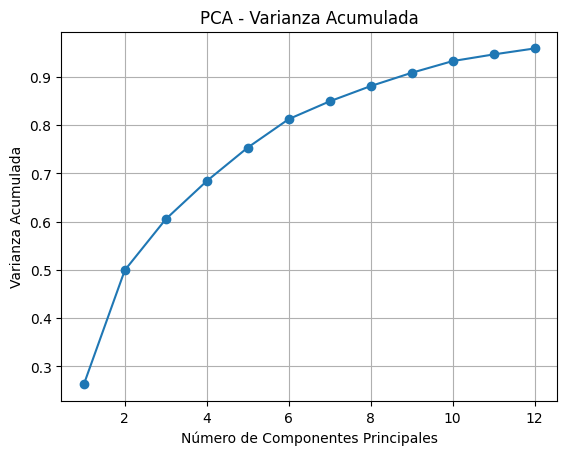

In [174]:
# Aplicar PCA para retener el 95% de la varianza
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(df_tranform_ind)

# Grafico actualizado de varianza acumulada
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('PCA - Varianza Acumulada')
plt.grid(True)
plt.show()



In [175]:
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Añadir la columna objetivo (Peso, en tu caso)
pca_df['Peso'] = df['Peso']

print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10      PC11      PC12   Peso
0     0.772223  0.466603 -0.424440 -0.288650 -0.571476  0.547189 -0.380403  0.809369 -0.047738 -0.308838  0.565478  0.252296  1.718
1     0.783719  0.384789 -0.347757 -0.343694  0.799945  0.248007 -0.389122  0.864223  0.035919 -0.321550  0.547032  0.262949  1.718
2     0.471469  0.726579 -0.377906 -0.285991 -0.588448  0.503911 -0.370591  0.962617  0.192283 -0.205499  0.557609  0.203241  1.943
3     0.482964  0.644765 -0.301223 -0.341036  0.782973  0.204729 -0.379310  1.017470  0.275941 -0.218212  0.539163  0.213895  1.943
4    -1.056567  1.172735 -0.074834 -0.259548  0.881528  0.405930  0.149137  0.807922 -0.244860 -0.394885 -0.608654 -0.354958  1.598
...        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...    ...
1639 -0.974918 -0.757901 -0.115434  0.097607 -0.961456 -1.099467  0.196240 -